<a href="https://colab.research.google.com/github/amanullahshah32/Deep-Learning/blob/main/02_PyTorch_Neural_Network_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **0. Architecture of a classification neural network**

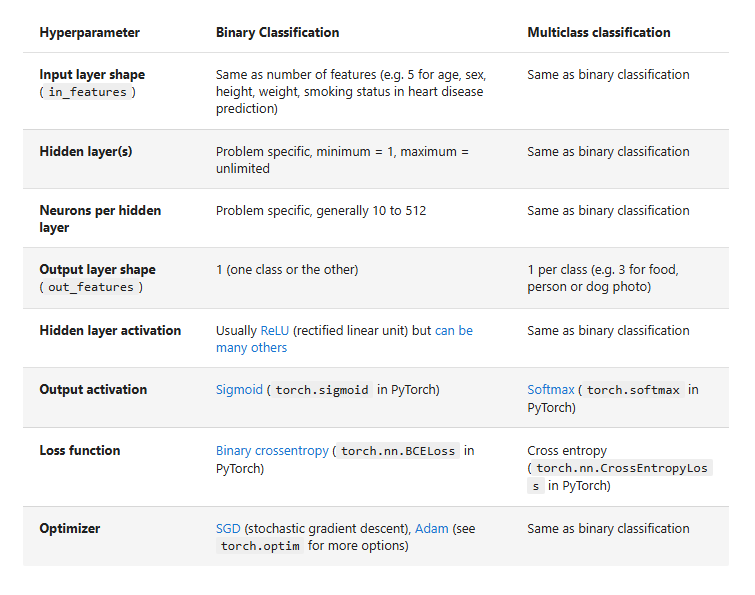

## **1. Make classification data and get it ready**

We'll use the make_circles() method from Scikit-Learn to generate two circles with different coloured dots.



In [1]:
from sklearn.datasets import make_circles

# Make 1000 samples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                    noise = 0.03, # a little bit of noise to the dots
                    random_state = 42)

In [2]:
print(f"first 5 X values; {X[:5]}\n")
print(f"first 5 y values; {y[:5]}")

first 5 X values; [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]

first 5 y values; [1 1 1 1 0]


Let's keep following the data explorer's motto of visualize, visualize, visualize and put them into a pandas DataFrame.



In [3]:
# Make DataFrame of circle data
import pandas as pd
circles = pd.DataFrame({"X1": X[:,0],
                        "X2": X[:,1],
                        "label": y
                        })

circles.head()

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


In [4]:
# Check different labels
circles.label.value_counts()

,count
label,
1,500
0,500


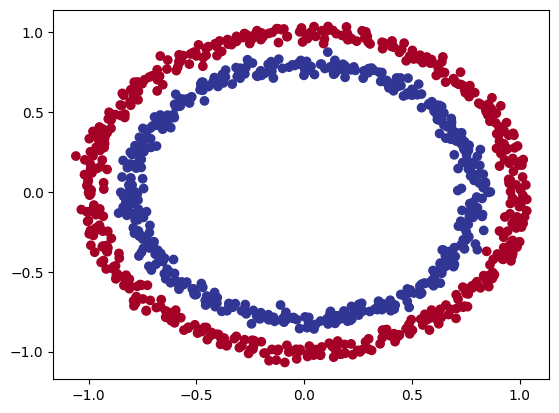

In [5]:
# Visualize with plot
import matplotlib.pyplot as plt
plt.scatter(x=X[:,0],
            y=X[:,1],
            c=y,
            cmap=plt.cm.RdYlBu)

Let's find out how we could build a PyTorch neural network to classify dots into red (0) or blue (1).



### **1.1 Input and Output shapes**

In [6]:
# Check the shapes of our features and labels
X.shape, y.shape

((1000, 2), (1000,))

In [7]:
# View the first example of features and labels
X_sample  = X[0]
y_sample  = y[0]

print(f"Values for one sample of X: {X_sample}\n")
print(f"Shapes for one sample of X: {X_sample.shape}\n")
print(f"\n Values for one sample of y: {y_sample}\n")
print(f"Shapes for one sample of y: {y_sample.shape}\n")



Values for one sample of X: [0.75424625 0.23148074]

Shapes for one sample of X: (2,)


 Values for one sample of y: 1

Shapes for one sample of y: ()



This tells us the second dimension for X means it has two features (vector) where as y has a single feature (scalar).

We have two inputs for one output.

### **1.2 Turn data into tensors and create train and test splits**

1. Turn our data into tensors (right now our data is in NumPy arrays and PyTorch prefers to work with PyTorch tensors).
2. Split our data into training and test sets (we'll train a model on the training set to learn the patterns between X and y and then evaluate those learned patterns on the test dataset).

In [8]:
# Turn data into tensors
# Otherwise this causes issues with computations later on

import torch
X = torch.from_numpy(X).type(torch.float32)
y = torch.from_numpy(y).type(torch.float32)

# View the first five samples
X[:5], y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [9]:
# Split data into train and test sets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

# check the length of train, test splits
len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

## **2. Building a model**

We'll break it down into a few parts.

Setting up device agnostic code (so our model can run on CPU or GPU if it's available).
* Constructing a model by subclassing nn.Module.
* Defining a loss function and optimizer.
* Creating a training loop (this'll be in the next section).

In [10]:
# Standard PyTorch imports
import torch
from torch import nn

# Make device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

Let's create a model class that:

1. Subclasses nn.Module (almost all PyTorch models are subclasses of nn.Module).
2. Creates 2 nn.Linear layers in the constructor capable of handling the input and output shapes of X and y.
3. Defines a forward() method containing the forward pass computation of the model.
4. Instantiates the model class and sends it to the target device.

In [11]:
# 1. Construct a model class that subclasses nn.Module
class CircleModelV0(nn.Module):
  def __init__(self):
    super().__init__()

    # 2. Create 2 nn.Linear layers capable of handling X and Y input and output shapes
    self.layer_1 = nn.Linear(in_features = 2, out_features= 5) # takes in 2 features (x) , priduces 5 features
    self.layer_2 = nn.Linear(in_features = 5, out_features = 1) # takes in 5 features , produces 1 feature jy

  # 3. Define a forward method containing the forward pass computation
  def forward(self,x):
    # Return the output of layer_2 , a single feature, the same shape as y
    return self.layer_2(self.layer_1(x)) # computation goes through layer_1 first then the output of layer_1 goes through layer_2



# 4. create an instance of the model and send it to target device
model_0 = CircleModelV0().to(device)
model_0

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)